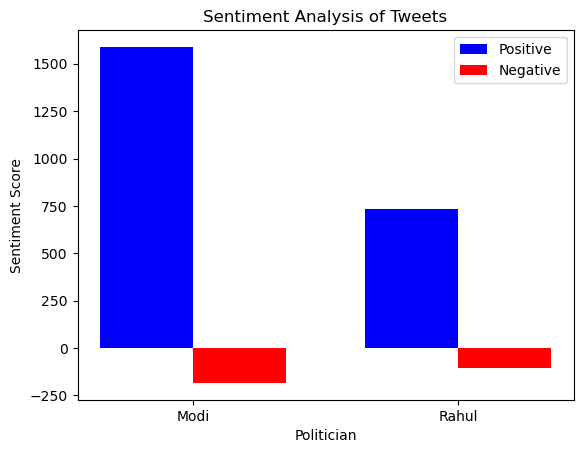

Overall Sentiment Scores:
Modi: 1405
Rahul: 628
Predicted Winner: Modi


In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Read the tweet data
modi = pd.read_csv("modi_reviews.csv")
rahul = pd.read_csv("rahul_reviews.csv")

# Handle missing values in the "Tweet" column
modi["Tweet"] = modi["Tweet"].fillna("")
rahul["Tweet"] = rahul["Tweet"].fillna("")

# Define stopwords
stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was",
    "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between",
    "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off",
    "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any",
    "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so",
    "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
])

# Function to clean and tokenize text
def clean_tokenize(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Remove punctuation and special characters
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords]
    return tokens

# Function to calculate sentiment polarity
def calculate_polarity(tokens):
    positive_words = ["good", "great", "happy", "positive"]
    negative_words = ["bad", "terrible", "horrible", "negative"]
    polarity = sum(tokens.count(word) for word in positive_words) - sum(tokens.count(word) for word in negative_words)
    return polarity

# Apply sentiment analysis to each tweet
modi["Tokens"] = modi["Tweet"].apply(clean_tokenize)
modi["Polarity"] = modi["Tokens"].apply(calculate_polarity)
rahul["Tokens"] = rahul["Tweet"].apply(clean_tokenize)
rahul["Polarity"] = rahul["Tokens"].apply(calculate_polarity)

# Calculate positive and negative sentiment scores
modi_positive_score = modi[modi["Polarity"] > 0]["Polarity"].sum()
modi_negative_score = modi[modi["Polarity"] < 0]["Polarity"].sum()
rahul_positive_score = rahul[rahul["Polarity"] > 0]["Polarity"].sum()
rahul_negative_score = rahul[rahul["Polarity"] < 0]["Polarity"].sum()

# Plot graph
politicians = ["Modi", "Rahul"]
positive_scores = [modi_positive_score, rahul_positive_score]
negative_scores = [modi_negative_score, rahul_negative_score]

bar_width = 0.35
index = np.arange(len(politicians))

fig, ax = plt.subplots()
bar1 = ax.bar(index - bar_width/2, positive_scores, bar_width, label="Positive", color="b")
bar2 = ax.bar(index + bar_width/2, negative_scores, bar_width, label="Negative", color="r")

ax.set_xlabel("Politician")
ax.set_ylabel("Sentiment Score")
ax.set_title("Sentiment Analysis of Tweets")
ax.set_xticks(index)
ax.set_xticklabels(politicians)
ax.legend()

plt.show()

# Calculate overall sentiment scores
modi_sentiment_score = modi["Polarity"].sum()
rahul_sentiment_score = rahul["Polarity"].sum()

# Print sentiment scores and predicted winner
print("Overall Sentiment Scores:")
print("Modi:", modi_sentiment_score)
print("Rahul:", rahul_sentiment_score)

# Predict the winner
if modi_sentiment_score > rahul_sentiment_score:
    winner = "Modi"
elif modi_sentiment_score < rahul_sentiment_score:
    winner = "Rahul"
else:
    winner = "Tie"

print("Predicted Winner:", winner)